<a href="https://colab.research.google.com/github/yzheng2001/AI/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch


math operation

In [32]:
tensor1 = torch.arange(10)
tensor2 = torch.arange(10)
tensor3 = tensor1+ tensor2
tensor3 = tensor1+ tensor2 + tensor3
tensor3

tensor([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36])

In [33]:
import torch.nn as nn
import torch.nn.functional as F

In [34]:
class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() #instatiate our nn.Module
    # fully connected FUNCTIONS, that
    # Applies a linear transformation to the incoming data: y = xA^T + b.
    # Args:
    #     in_features: size of each input sample
    #     out_features: size of each output sample
    #     bias: If set to False, the layer will not learn an additive bias.
    #         Default: True
    self.fc1=nn.Linear(in_features, h1)
    self.fc2=nn.Linear(h1, h2)
    self.out=nn.Linear(h2, out_features)

  def forward(self, x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [35]:
torch.manual_seed(41)
model = Model()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
url='https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
my_df['species']= my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 0.0)
my_df['species'] = my_df['species'].replace('virginica', 0.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0
146,6.3,2.5,5.0,1.9,0.0
147,6.5,3.0,5.2,2.0,0.0
148,6.2,3.4,5.4,2.3,0.0


In [39]:
#train test Split
# X are the features
X = my_df.drop('species', axis = 1)
y = my_df['species']
# convert data frame to numpy arrays
X=X.values
y=y.values



In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=41)

#convert X features an y labels to tensors type
X_train = torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [41]:
X_train.size()

torch.Size([120, 4])

In [42]:
# set criterion on model to measure the error
criterion = nn.CrossEntropyLoss()
#Choose Adam optimazor, lr is learning rate, the smaller the more accurate we want to train (longer time to train)
optimizer  =torch.optim.Adam(model.parameters(), lr = 0.01)

#Train our model by model.forward()
epochs = 100
losses = [] # losses means errors
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  #back propagation: take the error rate of foward propgation and
  #feed it bck throu the network to fine tue the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epoch')

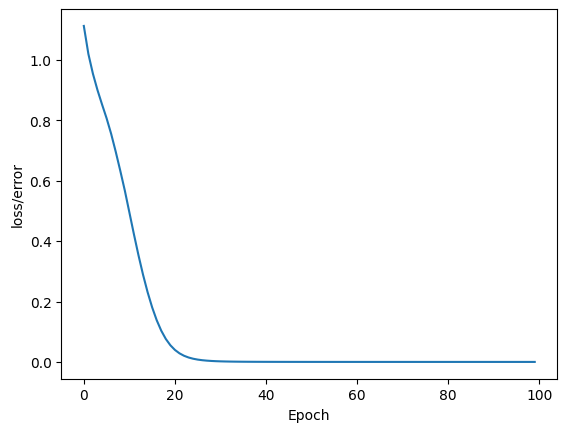

In [43]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [48]:
with torch.no_grad(): # turn off back propogation
  y_val= model.forward(X_test)
  loss = criterion(y_val, y_test)

loss

tensor(0.0001)

In [50]:

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([ 7.3390, -5.2881, -3.1515]) 	 0 	 0
2.)  tensor([ 8.1190, -5.8880, -3.4754]) 	 0 	 0
3.)  tensor([ 9.1938, -6.7023, -3.9079]) 	 0 	 0
4.)  tensor([ 7.5955, -5.4794, -3.2513]) 	 0 	 0
5.)  tensor([ 8.4335, -6.1239, -3.5994]) 	 0 	 0
6.)  tensor([ 7.3731, -5.3047, -3.1548]) 	 0 	 0
7.)  tensor([ 7.7902, -5.6310, -3.3342]) 	 0 	 0
8.)  tensor([ 7.7204, -5.5760, -3.3038]) 	 0 	 0
9.)  tensor([ 8.1505, -5.9077, -3.4834]) 	 0 	 0
10.)  tensor([ 8.6464, -6.2905, -3.6909]) 	 0 	 0
11.)  tensor([ 7.7731, -5.6196, -3.3291]) 	 0 	 0
12.)  tensor([ 6.1558, -4.3667, -2.6279]) 	 0 	 0
13.)  tensor([ 5.5162, -3.8840, -2.3699]) 	 0 	 0
14.)  tensor([ 6.2464, -4.4471, -2.6970]) 	 0 	 0
15.)  tensor([ 6.2450, -4.4375, -2.6687]) 	 0 	 0
16.)  tensor([ 7.7780, -5.6213, -3.3288]) 	 0 	 0
17.)  tensor([ 5.8561, -4.1371, -2.5149]) 	 0 	 0
18.)  tensor([ 7.5758, -5.4701, -3.2497]) 	 0 	 0
19.)  tensor([ 6.0450, -4.2801, -2.5862]) 	 0 	 0
20.)  tensor([ 5.3718, -3.7814, -2.2995]) 	 0 	 0
21.)  ten

In [52]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model.forward(new_iris))
  print(model(new_iris))

tensor([ 5.7913, -4.0933, -2.4768])
tensor([ 5.7913, -4.0933, -2.4768])


In [53]:
torch.save(model.state_dict(), 'my_iris_model.pt')

In [55]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

# Make sure it loaded correctly
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [56]:
another_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(another_iris))

tensor([ 5.7913, -4.0933, -2.4768])
